# EMG Signal Processing Assignment

## Setup
    Import necessary libraries: numpy, scipy, matplotlib.

## Part 1: Signal Filtering

    Task: Implement a Butterworth filter to remove high-frequency noise from the EMG signal.
    Task: Compare the frequency response of the original and filtered signals using a frequency plot.

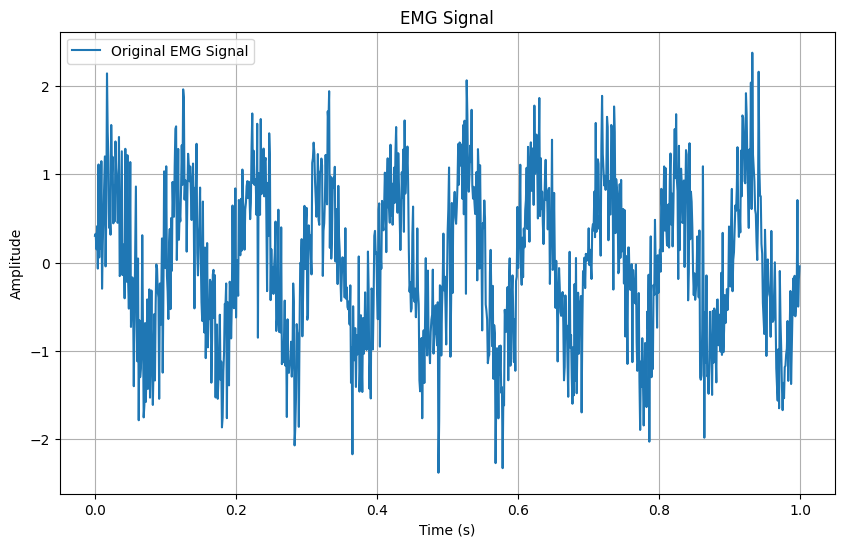

In [287]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Generate example EMG signal with noise
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second)
emg_signal = np.sin(2*np.pi*10*t) + 0.5*np.random.randn(len(t))

# Plot original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, emg_signal, label='Original EMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.grid(True)
plt.show()


In [288]:
#Implement Butterworth filter or any other best suited filter.
b, a = butter(7, 300/1000 , btype = 'low')
z = filtfilt(b,a, emg_signal)


Text(0.5, 1.0, 'EMG Signal after Applying Butterworth')

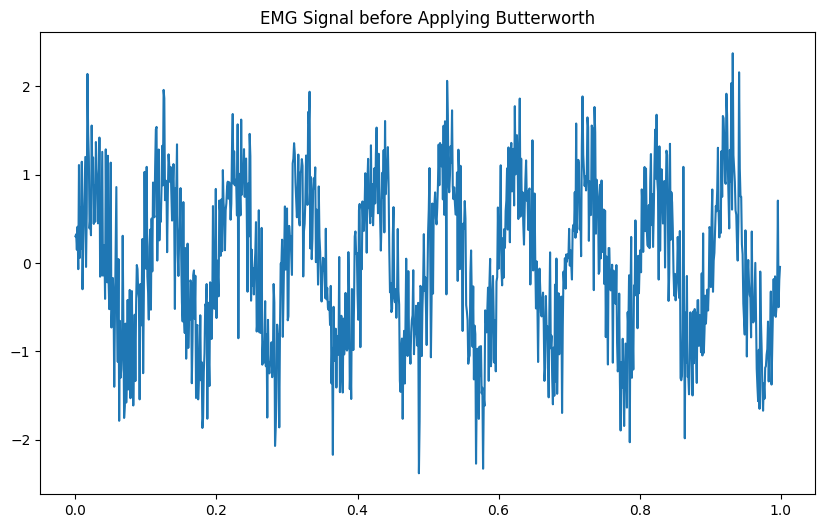

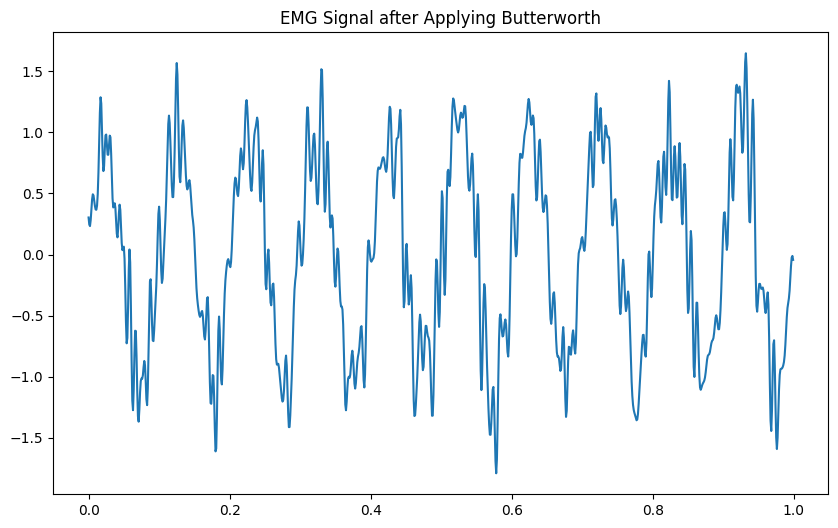

In [289]:
#Compare the frequency response of the original and filtered signals using a frequency plot.

plt.figure(figsize=(10, 6))
plt.plot(t,emg_signal , label='EMG Signal after applying butterworth')
plt.title('EMG Signal before Applying Butterworth')

plt.figure(figsize=(10, 6))
plt.plot(t, z, label='EMG Signal after applying butterworth')
plt.title('EMG Signal after Applying Butterworth')




## Part 2: Peak Detection

    Task: Utilize scipy.signal.find_peaks to detect peaks in the filtered EMG signal.
    Question: What parameters can be adjusted in find_peaks function to improve peak detection accuracy?
    Task: Plot the original signal with markers indicating the detected peaks.

[ 17 125 224 330 427 517 624 720 823 932]


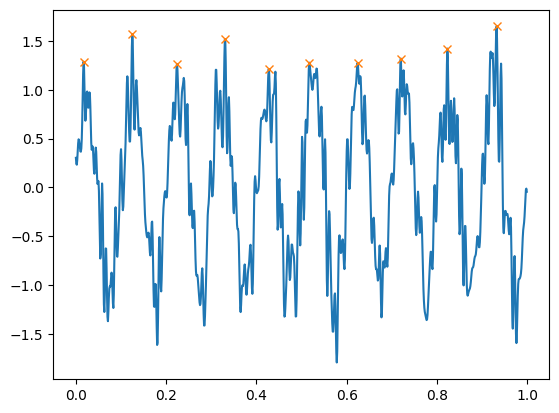

In [290]:
indices = find_peaks(z , height = 0.8, distance=0.09*fs)[0]
print(indices)
plt.plot(t,z)
plt.plot(t[indices] ,z[indices] ,'x')
plt.show()

Answer the Question here:

In [228]:
#For detecting peak in an unfiltered data you can adjust the height parameter to the most suitable amplitude range. For example in this case if you set height =0.8 the peaks belonging only above that amplitude threshild will be detected rather than other small peaks
#Second important parameter for a periodic signal like this is to set the distance parameter, which finds peaks after a certain samples (we cannot use this parameter for peak detection in case of EMG signals as they are not periodic)

## Part 3: Peak Start and End Time Detection

    Task: Develop a method to determine the start and end times of each detected peak.
    Question: Why is it necessary to identify the precise onset and offset times of muscle activation in EMG signals?
    Task: Visualize the original signal with annotated start and end times of peaks.

[0.014 0.111 0.207 0.307 0.409 0.501 0.61  0.708 0.805 0.908]
[0.034 0.145 0.249 0.342 0.445 0.547 0.643 0.741 0.847 0.945]


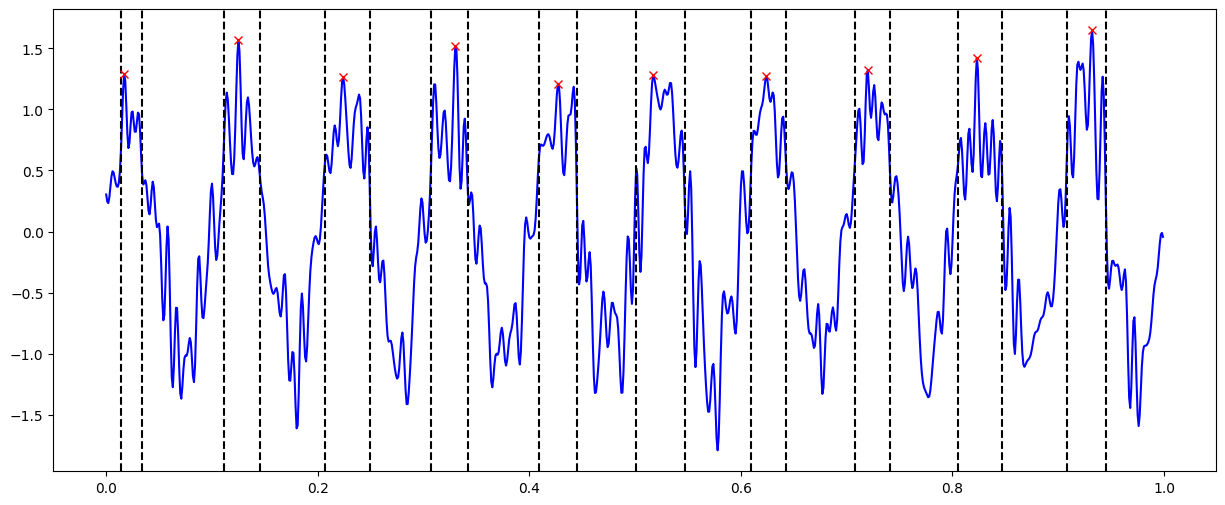

In [291]:
# Start time detection
threshold = 0.5
start_index = []
ip=0
for j in indices:
    for i in range(0,j):
        if(z[i-1]<threshold and z[i]>=threshold and j-i<60):
            start_index.append(i)
            break


print(t[start_index])
# End time detection

end_index =[] 
ep=0

for j in indices:
    for i in range(j+60,j,-1): # -20 is manipulation done according to this data it is not valid for any general code
        if(z[i-1]>threshold and z[i]<=threshold and i-j<60):
            end_index.append(i)
            break
print(t[end_index])


plt.figure(figsize=(15,6))
plt.plot(t, z, 'b')      
for n in range(0, len(t[start_index])):
    plt.axvline(x=t[start_index][n], color='k', linestyle='--')
for n in range(0, len(t[end_index])):
    plt.axvline(x=t[end_index][n], color='k',linestyle='--')
plt.plot(t[indices] ,z[indices] ,'x',color = 'r')


Answer the Question here:

In [27]:
#the precise identification of onset and offset times in EMG signals provides detailed information into muscle function and coordination

## Part 4: Envelope Extraction

    Task: Implement the Hilbert transform to extract the envelope of the filtered EMG signal.
    Question: What information does the envelope of an EMG signal provide about muscle activity?
    Task: Plot the original signal overlaid with its envelope.

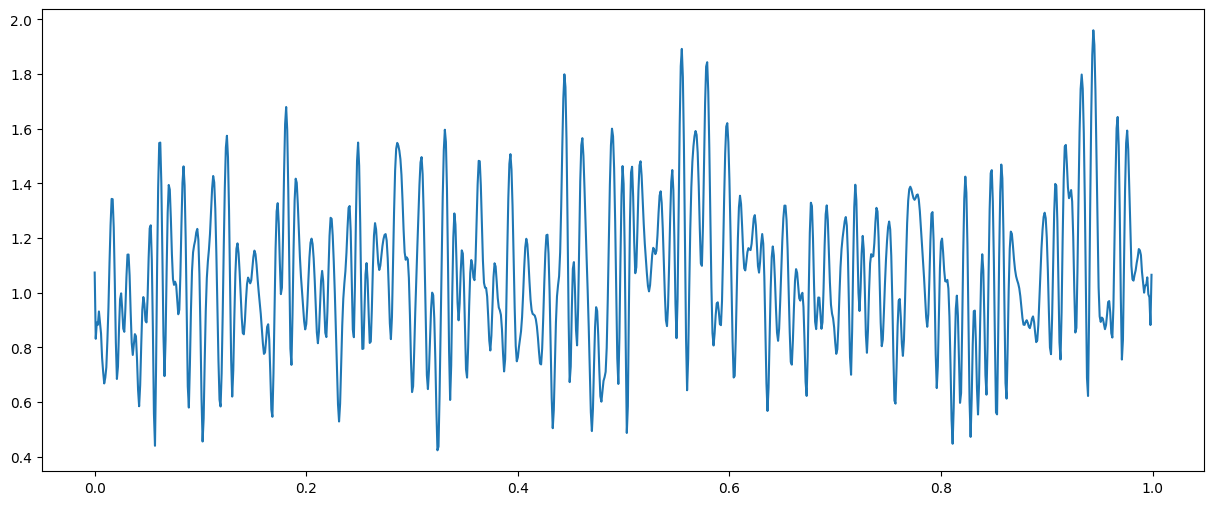

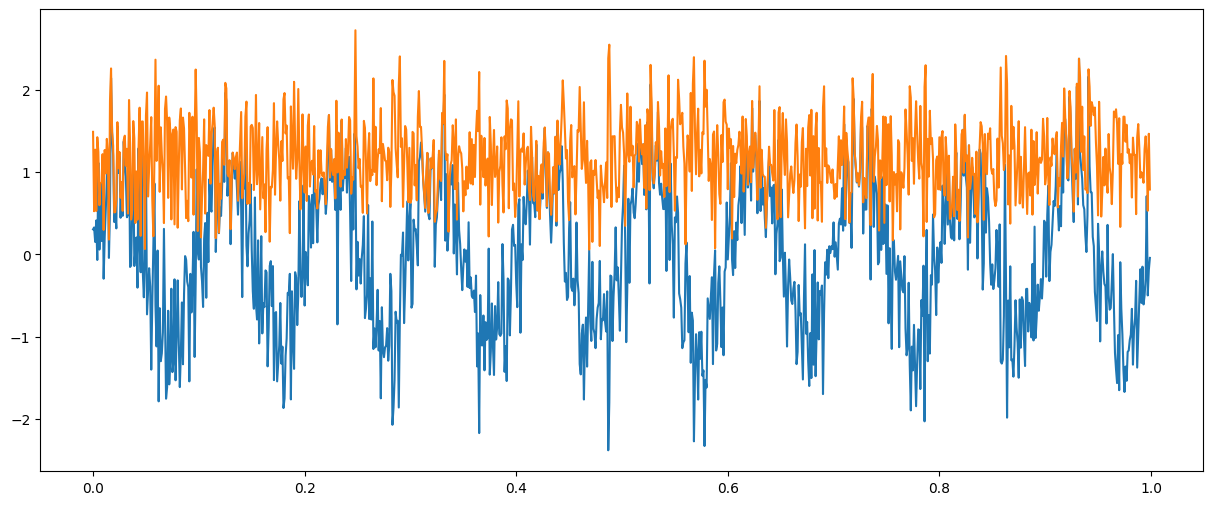

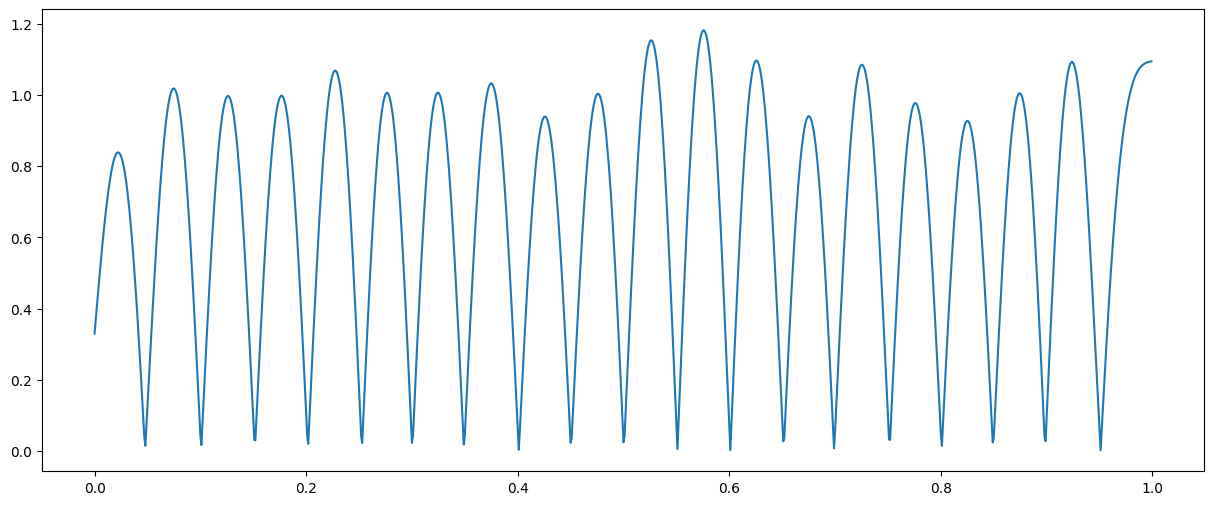

In [292]:
from scipy.signal import hilbert

plt.figure(figsize=(15,6))
h=np.abs(hilbert(z))    
plt.plot(t,h)

plt.figure(figsize=(15,6))
h2=abs(hilbert(emg_signal))
plt.plot(t,emg_signal)
plt.plot(t,h2)

# I was facing problem with this part , finally I couldn't pull it off
# I have decided to apply lowpass to get envelope

r,s = butter(7, 30/1000 , btype = 'low')
zr = filtfilt(r,s, emg_signal)
plt.figure(figsize=(15,6))
plt.plot(t,np.abs(zr))


Answer the Question here:

In [28]:
#

## Part 5: Time Domain Analysis

    Task: Calculate key metrics such as mean, variance, and RMS (Root Mean Square) of the cleaned EMG signal.
    Task: Interpret the calculated metrics in the context of muscle activity and signal characteristics.

In [293]:
# Calculate key metrics.
rms = np.sqrt(np.mean(np.square(zr)))
print("RMS value of the cleaned EMG signal:",rms)
mean = np.mean(np.abs(zr))
print("mean of the cleaned EMG signal: ",mean)
var = np.mean(np.square(zr))
print("variance of the cleaned EMG signal: ",var)


RMS value of the cleaned EMG signal: 0.7324464864602268
mean of the cleaned EMG signal:  0.6594817637313308
variance of the cleaned EMG signal:  0.5364778555279311


Interpretation:
- Mean: A higher mean value may suggest increased muscle activation, while a lower mean value may indicate reduced muscle activity.
- Variance: Higher variance may indicate greater variability in muscle activation, possibly due to changes in force production or signal noise.
- RMS: A higher RMS value corresponds to stronger muscle contractions, while a lower RMS value suggests weaker muscle activity.
These interpretations can provide insights into muscle performance, fatigue, and overall neuromuscular function.

## Part 6: Frequency Domain Analysis

    Task: Apply the Fast Fourier Transform (FFT) to analyze the frequency components of the cleaned EMG signal.
    Task: Plot the frequency spectrum of the EMG signal and identify prominent frequency peaks.

Text(0.5, 1.0, 'Frequency plot')

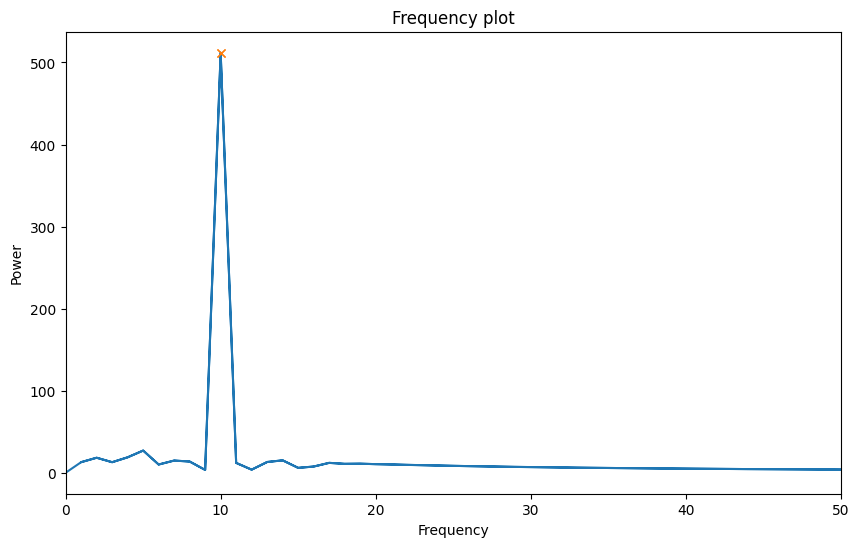

In [296]:

from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks


yfb = fft(zr)
xf = fftfreq(fs, 1 / fs)
yf = fft(emg_signal)

indices = find_peaks(np.abs(yfb) , height = 450 )[0]

plt.figure(figsize=(10, 6))
plt.plot(np.abs(xf), np.abs(yfb), label='EMG Signal after applying butterworth')
plt.plot(np.abs(xf)[indices] ,np.abs(yfb)[indices] ,'x')
plt.xlim(0,50)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Frequency plot')